# load dataset

In [1]:
from sklearn.datasets import load_digits
X = load_digits().data
y = load_digits().target

In [2]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
y

array([0, 1, 2, ..., 8, 9, 8])

# AutoML

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [5]:
# chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [6]:
# Tạo danh sách các mô hình muốn sử dụng. 
models = {
    'random_forest': RandomForestClassifier(),
    'svc': SVC(),
    'logistic_regression': LogisticRegression(max_iter=1000)
}

# Danh sách các siêu tham số để GridSearch nó tìm kiếm trong mỗi mô hình tương ứng.
params = {
    'random_forest': {
        'clf__n_estimators': [50, 100, 200], 
        'clf__max_depth': [20, 30, 40]
    },
    'svc': {
        'clf__C': [0.1, 1, 10], 
        'clf__kernel': ['linear', 'rbf']
    },
    'logistic_regression': {
        'clf__C': [0.1, 1, 10]
    }
}

In [7]:
# Tạo pipeline với mỗi mô hình. Ở đây sẽ có 3 pipeline ứng với 3 mô hình. 
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', model)
    ])

In [8]:

# Tạo danh sách các mô hình GridSearch ứng với từng model bên trên. 
grid_searches = {}
for name in pipelines:
    grid_searches[name] = GridSearchCV(
        pipelines[name], 
        params[name], 
        cv=5,
        n_jobs=-1
    )

In [9]:
from sklearn.metrics import accuracy_score

# Tìm xem model với tham số nào có hiệu suất tốt nhất. 
best_model = None
best_score = -1
# Từ danh sách các GridSearch của các model, ta fit chúng với dữ liệu và chọn model có hiệu suất tốt nhất.
for name, grid_search in grid_searches.items():
    grid_search.fit(X_train, y_train)
    best_score_for_model = grid_search.best_score_
    if best_score_for_model > best_score:
        best_score = best_score_for_model
        best_model = grid_search.best_estimator_

# In mô hình tốt nhất và hiệu suất của nó.
print(f"Model tốt nhất: {best_model}")
print(f"Hiệu suất của nó: {best_score}")

Model tốt nhất: Pipeline(steps=[('scaler', StandardScaler()), ('clf', SVC(C=10))])
Hiệu suất của nó: 0.977551867219917


In [10]:
# dự đoán kết quả
y_pred = best_model.predict(X_test)

In [11]:
# bảng thống kê kết quả
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.98      1.00      0.99        55
           2       0.95      1.00      0.97        52
           3       0.98      0.95      0.96        56
           4       0.98      1.00      0.99        64
           5       0.99      0.97      0.98        73
           6       0.98      1.00      0.99        57
           7       1.00      0.98      0.99        62
           8       0.96      0.94      0.95        52
           9       0.97      0.96      0.96        68

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594



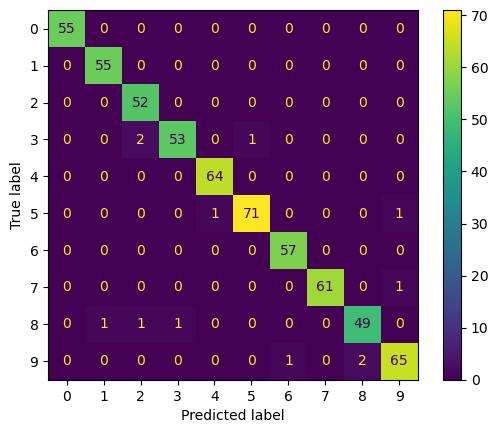

In [12]:
# ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.show()